# ANALISIS DATA CALEG DPR NTT 2019
Untuk artikel lengkapnya bisa cek di [sini](#). Untuk pengolahan data menggunakan bahasa python dan Jupyter Notebook. Data yang diolah bisa dilihat di bawah.

## Prerequisites
1. Install [Python](https://realpython.com/installing-python/)
2. Install [Jupiter Notebook](https://jupyter.readthedocs.io/en/latest/install.html)

## Install Library
```sh
$ pip3 install mysql-connector
$ pip3 install matplotlib
$ pip3 install numpy
```





### Import

In [2]:
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np


### Base Configuration

In [35]:
mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  passwd="",
  db="pemilu_ntt"
)

def selectDataMySQL(query):
    mycursor = mydb.cursor()
    mycursor.execute(query)
    myresult = mycursor.fetchall()
    return myresult

def showPieGraphic(label,value,title):
    plt.pie(value, labels=label, startangle=90, autopct='%.1f%%')
    plt.title(title)
    plt.show()


def shoBarHorizontalGraphic(label,value,xLabelTitle,yLabelTitle,title,fontSize,width,height):
    index = np.arange(len(label))
    plt.figure(figsize=(width,height))
    plt.barh(index, value)
    plt.xlabel(xLabelTitle, fontsize=fontSize)
    plt.ylabel(yLabelTitle, fontsize=fontSize)
    plt.yticks(index, label, fontsize=fontSize)
    plt.title(title)
    plt.show()

def shoBarGraphic(label,value,xLabelTitle,yLabelTitle,title,rotationValue):
    index = np.arange(len(label))
    plt.bar(index, value)
    plt.xlabel(xLabelTitle, fontsize=10)
    plt.ylabel(yLabelTitle, fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=rotationValue)
    plt.title(title)
    plt.show()
    


### Caleg termuda, tertua dan rata-rata umur caleg


In [6]:
dataYoungerNtt1 = selectDataMySQL('SELECT  nama_lengkap,YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y")) AS age FROM caleg_details where (YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y")) = (SELECT min(YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y"))) from caleg_details WHERE dapil_id = 60)) and dapil_id = 60')
print("Caleg termuda dari Dapil NTT 1 adalah %s dengan umur %s"%(dataYoungerNtt1[0][0],dataYoungerNtt1[0][1]))

dataYoungerNtt2 = selectDataMySQL('SELECT  nama_lengkap,YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y")) AS age FROM caleg_details where (YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y")) = (SELECT min(YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y"))) from caleg_details WHERE dapil_id = 61)) and dapil_id = 61')
print("Caleg termuda dari Dapil NTT 2 adalah %s dengan umur %s"%(dataYoungerNtt2[0][0],dataYoungerNtt2[0][1]))

dataOlderNtt1 = selectDataMySQL('SELECT  nama_lengkap,YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y")) AS age FROM caleg_details where (YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y")) = (SELECT max(YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y"))) from caleg_details WHERE dapil_id = 60)) and dapil_id = 60')
print("Caleg tertua dari Dapil NTT 1 adalah %s dengan umur %s"%(dataOlderNtt1[0][0],dataOlderNtt1[0][1]))

dataOlderNtt2 = selectDataMySQL('SELECT  nama_lengkap,YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y")) AS age FROM caleg_details where (YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y")) = (SELECT max(YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y"))) from caleg_details WHERE dapil_id = 61)) and dapil_id = 61')
print("Caleg tertua dari Dapil NTT 2 adalah %s dengan umur %s"%(dataOlderNtt2[0][0],dataOlderNtt2[0][1]))

averageOldNtt1 = selectDataMySQL('SELECT AVG(YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y"))) as average FROM caleg_details where dapil_id = 60')
print("Rata-rata umur caleg dari Dapil NTT 1 adalah %s tahun"%(averageOldNtt1[0][0]))

averageOldNtt2 = selectDataMySQL('SELECT AVG(YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,"%d/%m/%Y"))) as average FROM caleg_details where dapil_id = 61')
print("Rata-rata umur caleg dari Dapil NTT 2 adalah %s tahun"%(averageOldNtt2[0][0]))



Caleg termuda dari Dapil NTT 1 adalah SITI AMINAH dengan umur 23
Caleg termuda dari Dapil NTT 2 adalah SRI ISMAWATI dengan umur 24
Caleg tertua dari Dapil NTT 1 adalah PAULUS MOA dengan umur 79
Caleg tertua dari Dapil NTT 2 adalah MARIA AGUSTINA NOACH dengan umur 81
Rata-rata umur caleg dari Dapil NTT 1 adalah 49.2892 tahun
Rata-rata umur caleg dari Dapil NTT 2 adalah 47.7835 tahun



### Distribusi jumlah caleg berdasarkan jenis kelamin


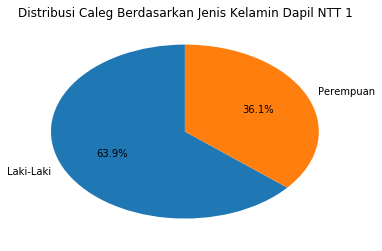

In [7]:
dataAgeNtt1 = selectDataMySQL('SELECT jenis_kelamin,COUNT(jenis_kelamin) FROM caleg_details WHERE dapil_id = 60 GROUP by jenis_kelamin')
jenisKelamin = []
jumlah = []
for data in dataAgeNtt1:
    jenisKelamin.append(data[0])
    jumlah.append(data[1])

showPieGraphic(jenisKelamin,jumlah,'Distribusi Caleg Berdasarkan Jenis Kelamin Dapil NTT 1')


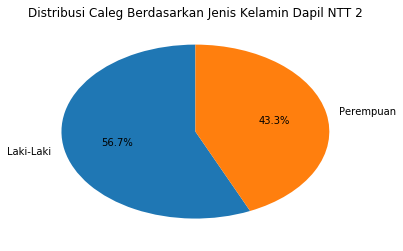

In [8]:
dataAgeNtt1 = selectDataMySQL('SELECT jenis_kelamin,COUNT(jenis_kelamin) FROM caleg_details WHERE dapil_id = 61 GROUP by jenis_kelamin')
jenisKelamin = []
jumlah = []
for data in dataAgeNtt1:
    jenisKelamin.append(data[0])
    jumlah.append(data[1])

showPieGraphic(jenisKelamin,jumlah,'Distribusi Caleg Berdasarkan Jenis Kelamin Dapil NTT 2')


### Distribusi jumlah caleg berdasarkan pekerjaan

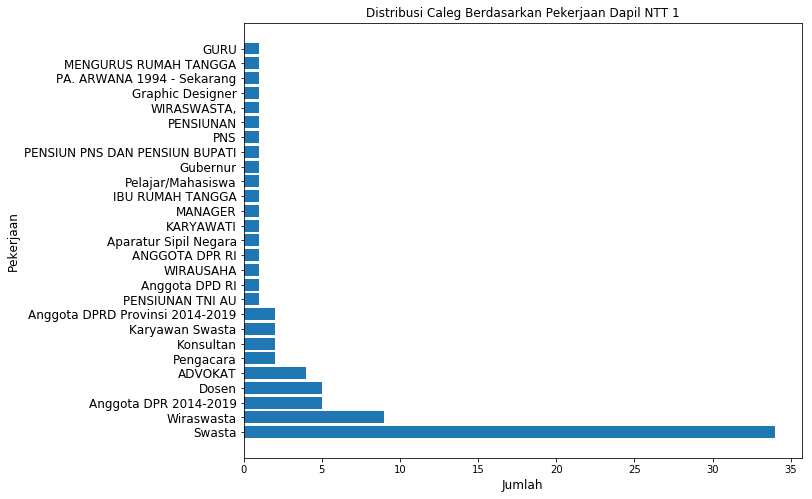

In [36]:
jobNtt1 = selectDataMySQL('SELECT pekerjaan,COUNT(pekerjaan) as jumlah FROM caleg_details WHERE dapil_id = 60 GROUP by pekerjaan ORDER by jumlah desc')
label = []
value = []
for data in jobNtt1:
    label.append(data[0])
    value.append(data[1])


shoBarHorizontalGraphic(label,value,"Jumlah","Pekerjaan","Distribusi Caleg Berdasarkan Pekerjaan Dapil NTT 1",12,10,8)

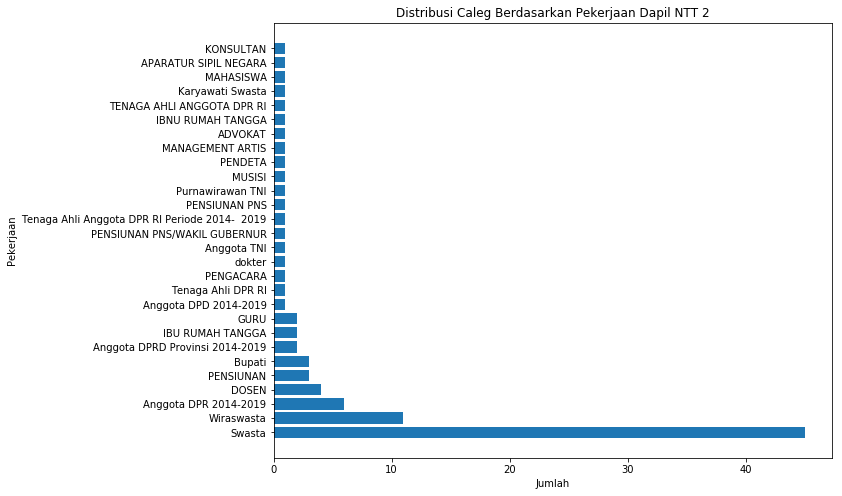

In [37]:
jobNtt1 = selectDataMySQL('SELECT pekerjaan,COUNT(pekerjaan) as jumlah FROM caleg_details WHERE dapil_id = 61 GROUP by pekerjaan ORDER by jumlah desc')
label = []
value = []
for data in jobNtt1:
    label.append(data[0])
    value.append(data[1])

shoBarHorizontalGraphic(label,value,"Jumlah","Pekerjaan","Distribusi Caleg Berdasarkan Pekerjaan Dapil NTT 2",10,10,8)

### Distribusi jumlah caleg berdasarkan agama



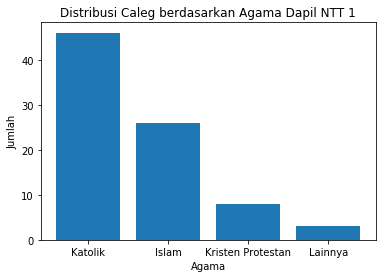

In [26]:
religionNtt1 = selectDataMySQL('SELECT agama,COUNT(agama) as jumlah FROM caleg_details WHERE dapil_id = 60 GROUP by agama ORDER by jumlah desc')
label = []
value = []
for data in religionNtt1:
    label.append(data[0])
    value.append(data[1])

shoBarGraphic(label,value,"Agama","Jumlah","Distribusi Caleg berdasarkan Agama Dapil NTT 1",0)

### Distribusi jumlah caleg berdasarkan umur



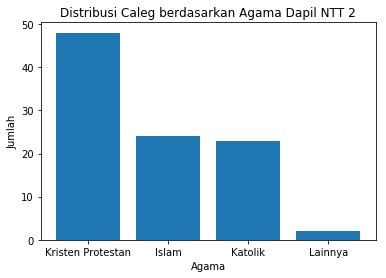

In [112]:
religionNtt2 = selectDataMySQL('SELECT agama,COUNT(agama) as jumlah FROM caleg_details WHERE dapil_id = 61 GROUP by agama ORDER by jumlah desc')
label = []
value = []
for data in religionNtt2:
    label.append(data[0])
    value.append(data[1])

shoBarGraphic(label,value,"Agama","Jumlah","Distribusi Caleg berdasarkan Agama Dapil NTT 2",10)

### Distribusi jumlah caleg berdasarkan pendidikan


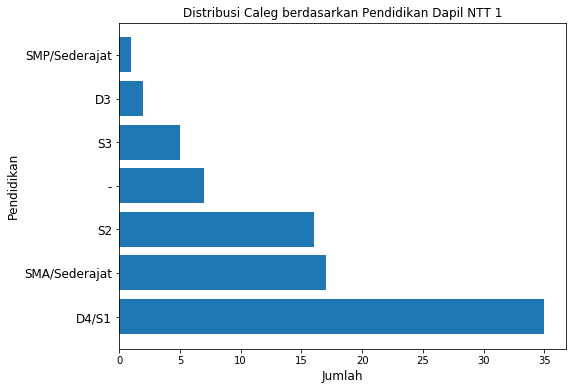

In [39]:
educationLevelNtt1 = selectDataMySQL('SELECT pendidikan,COUNT(pendidikan) as jumlah FROM caleg_details WHERE dapil_id = 60 GROUP by pendidikan ORDER by jumlah desc')
label = []
value = []
for data in educationLevelNtt1:
    label.append(data[0])
    value.append(data[1])

shoBarHorizontalGraphic(label,value,"Jumlah","Pendidikan","Distribusi Caleg berdasarkan Pendidikan Dapil NTT 1",12,8,6)

> Pendidikan dengan label "-", data tidak tersedia pada web KPU


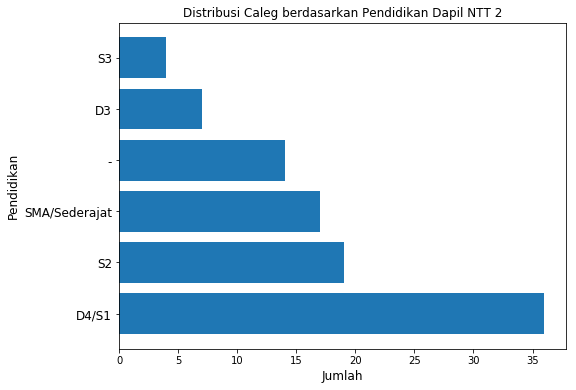

In [44]:
educationLevelNtt2 = selectDataMySQL('SELECT pendidikan,COUNT(pendidikan) as jumlah FROM caleg_details WHERE dapil_id = 61 GROUP by pendidikan ORDER by jumlah desc')
label = []
value = []
for data in educationLevelNtt2:
    label.append(data[0])
    value.append(data[1])

shoBarHorizontalGraphic(label,value,"Jumlah","Pendidikan","Distribusi Caleg berdasarkan Pendidikan Dapil NTT 2",12,8,6)

> Pendidikan dengan label "-", data tidak tersedia pada web KPU

### Distribusi jumlah caleg berdasarkan umur

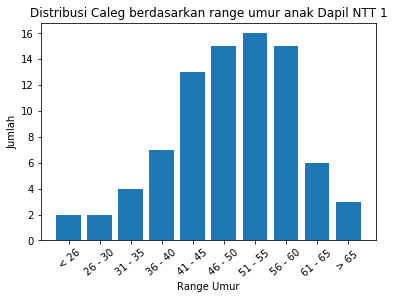

In [118]:
ageNtt1 = selectDataMySQL("SELECT CASE WHEN age <= 25 THEN ' < 26'"
		+"WHEN age BETWEEN 26 and 30 THEN '26 - 30'"
        +"WHEN age BETWEEN 31 and 35 THEN '31 - 35' "
        +"WHEN age BETWEEN 36 and 40 THEN '36 - 40' "
        +"WHEN age BETWEEN 41 and 45 THEN '41 - 45' "
        +"WHEN age BETWEEN 46 and 50 THEN '46 - 50' "
        +"WHEN age BETWEEN 51 and 55 THEN '51 - 55' "
        +"WHEN age BETWEEN 56 and 60 THEN '56 - 60' "
        +"WHEN age BETWEEN 61 and 65 THEN '61 - 65' "
        +"WHEN age > 65 THEN '> 65 ' "
        +"END as range_umur, "
        +"COUNT(*) AS jumlah "
        +"FROM (SELECT YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,'%d/%m/%Y')) AS age FROM caleg_details WHERE dapil_id=60)  as dummy_table GROUP BY range_umur ORDER BY range_umur")

label = []
value = []
for data in ageNtt1:
    label.append(data[0])
    value.append(data[1])

shoBarGraphic(label,value,"Range Umur","Jumlah","Distribusi Caleg berdasarkan range umur anak Dapil NTT 1",40)


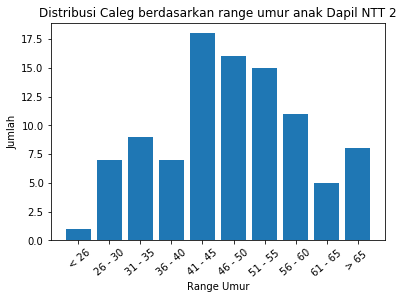

In [119]:
ageNtt1 = selectDataMySQL("SELECT CASE WHEN age <= 25 THEN ' < 26'"
		+"WHEN age BETWEEN 26 and 30 THEN '26 - 30'"
        +"WHEN age BETWEEN 31 and 35 THEN '31 - 35' "
        +"WHEN age BETWEEN 36 and 40 THEN '36 - 40' "
        +"WHEN age BETWEEN 41 and 45 THEN '41 - 45' "
        +"WHEN age BETWEEN 46 and 50 THEN '46 - 50' "
        +"WHEN age BETWEEN 51 and 55 THEN '51 - 55' "
        +"WHEN age BETWEEN 56 and 60 THEN '56 - 60' "
        +"WHEN age BETWEEN 61 and 65 THEN '61 - 65' "
        +"WHEN age > 65 THEN '> 65 ' "
        +"END as range_umur, "
        +"COUNT(*) AS jumlah "
        +"FROM (SELECT YEAR(CURDATE()) - YEAR(STR_TO_DATE(tanggal_lahir,'%d/%m/%Y')) AS age FROM caleg_details WHERE dapil_id=61)  as dummy_table GROUP BY range_umur ORDER BY range_umur")

label = []
value = []
for data in ageNtt1:
    label.append(data[0])
    value.append(data[1])

shoBarGraphic(label,value,"Range Umur","Jumlah","Distribusi Caleg berdasarkan range umur anak Dapil NTT 2",40)


### Distribusi jumlah caleg berdasarkan jumlah anak

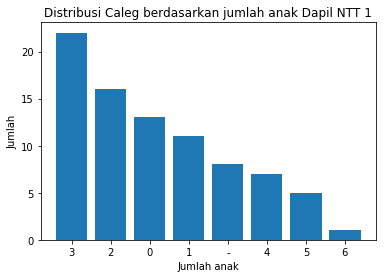

In [115]:
childCountNtt1 = selectDataMySQL('SELECT jumlah_anak,COUNT(jumlah_anak) as jumlah FROM `caleg_details` WHERE dapil_id = 60 GROUP by jumlah_anak ORDER by jumlah desc')
label = []
value = []
for data in childCountNtt1:
    label.append(data[0])
    value.append(data[1])

shoBarGraphic(label,value,"Jumlah anak","Jumlah","Distribusi Caleg berdasarkan jumlah anak Dapil NTT 1",0)

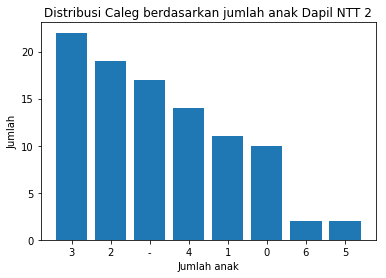

In [116]:
childCountNtt2 = selectDataMySQL('SELECT jumlah_anak,COUNT(jumlah_anak) as jumlah FROM `caleg_details` WHERE dapil_id = 61 GROUP by jumlah_anak ORDER by jumlah desc')
label = []
value = []
for data in childCountNtt2:
    label.append(data[0])
    value.append(data[1])

shoBarGraphic(label,value,"Jumlah anak","Jumlah","Distribusi Caleg berdasarkan jumlah anak Dapil NTT 2",0)

> Data dengan label "-", Caleg tidak mempublikasikan data jumlah anak di web KPU

### Distribusi jumlah caleg berdasarkan status perkawinan

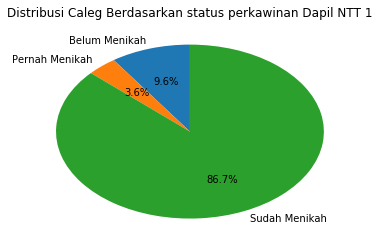

In [121]:
statusKawinNtt1 = selectDataMySQL('SELECT status_perkawinan,COUNT(status_perkawinan) FROM `caleg_details` WHERE dapil_id = 60 GROUP by status_perkawinan')
statusKawin = []
jumlah = []
for data in statusKawinNtt1:
    statusKawin.append(data[0])
    jumlah.append(data[1])

showPieGraphic(statusKawin,jumlah,'Distribusi Caleg Berdasarkan status perkawinan Dapil NTT 1')


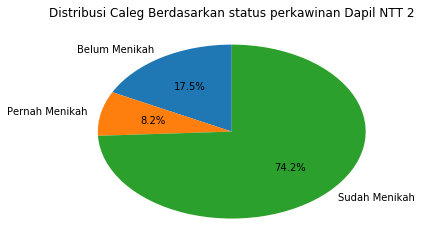

In [122]:
statusKawinNtt2 = selectDataMySQL('SELECT status_perkawinan,COUNT(status_perkawinan) FROM `caleg_details` WHERE dapil_id = 61 GROUP by status_perkawinan')
statusKawin = []
jumlah = []
for data in statusKawinNtt2:
    statusKawin.append(data[0])
    jumlah.append(data[1])

showPieGraphic(statusKawin,jumlah,'Distribusi Caleg Berdasarkan status perkawinan Dapil NTT 2')
